In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/90000-cars-data-from-1970-to-2024/CarsData.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/kaggle/input/90000-cars-data-from-1970-to-2024/CarsData.csv')

In [5]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [7]:
# Data Cleaning

In [8]:
# Check Missing Values

In [9]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [10]:
# The data have been cleaned

In [11]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [ ]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['model'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

In [13]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['year'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

year
2019    26165
2017    21616
2016    15724
2018    13570
2015     7586
2014     4053
2020     4040
2013     2590
2012      633
2011      432
2010      340
2009      277
2008      199
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2024        1
Name: count, dtype: int64

In [15]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['transmission'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64

In [16]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['mileage'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

mileage
10       647
5000     641
1000     615
6000     456
3000     371
        ... 
35897      1
26647      1
59044      1
32404      1
25372      1
Name: count, Length: 42214, dtype: int64

In [17]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['tax'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

tax
145    47377
150    10816
30      8423
20      8248
125     6562
0       6259
200     2424
160     2056
135     1217
205      696
165      679
235      662
260      530
140      369
300      341
240      202
325      185
265      174
305       99
555       78
570       57
330       51
10        25
565       22
190       19
195       16
120       14
115       12
155       12
580       10
230       10
270        9
315        8
220        7
280        6
290        6
540        6
185        5
250        4
255        3
245        3
130        2
210        2
110        2
295        1
535        1
520        1
515        1
Name: count, dtype: int64

In [ ]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['mpg'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

In [18]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['engineSize'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

engineSize
2.0    26886
1.0    17083
1.5    11247
1.4    10893
1.6     8700
1.2     6718
3.0     5395
2.1     3970
1.8     1715
1.3     1307
1.7      907
1.1      558
2.2      466
2.5      454
4.0      355
0.0      268
2.9      170
2.3      145
4.4       79
2.4       72
5.0       52
5.5       44
2.8       41
1.9       27
3.2       27
4.2       26
4.7       24
5.2       23
3.5       20
6.2       13
2.7        8
0.6        7
6.0        2
6.6        2
3.7        2
4.1        2
4.5        1
4.3        1
5.4        1
6.3        1
Name: count, dtype: int64

In [19]:
# Assuming covid_filled is the DataFrame containing the car dataset
data_counts = data['Manufacturer'].value_counts()

# Display the value counts for the 'Tests/1M pop' column
data_counts

Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

In [12]:
# Verify Column

print(data.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')


In [20]:
# Data Visualization

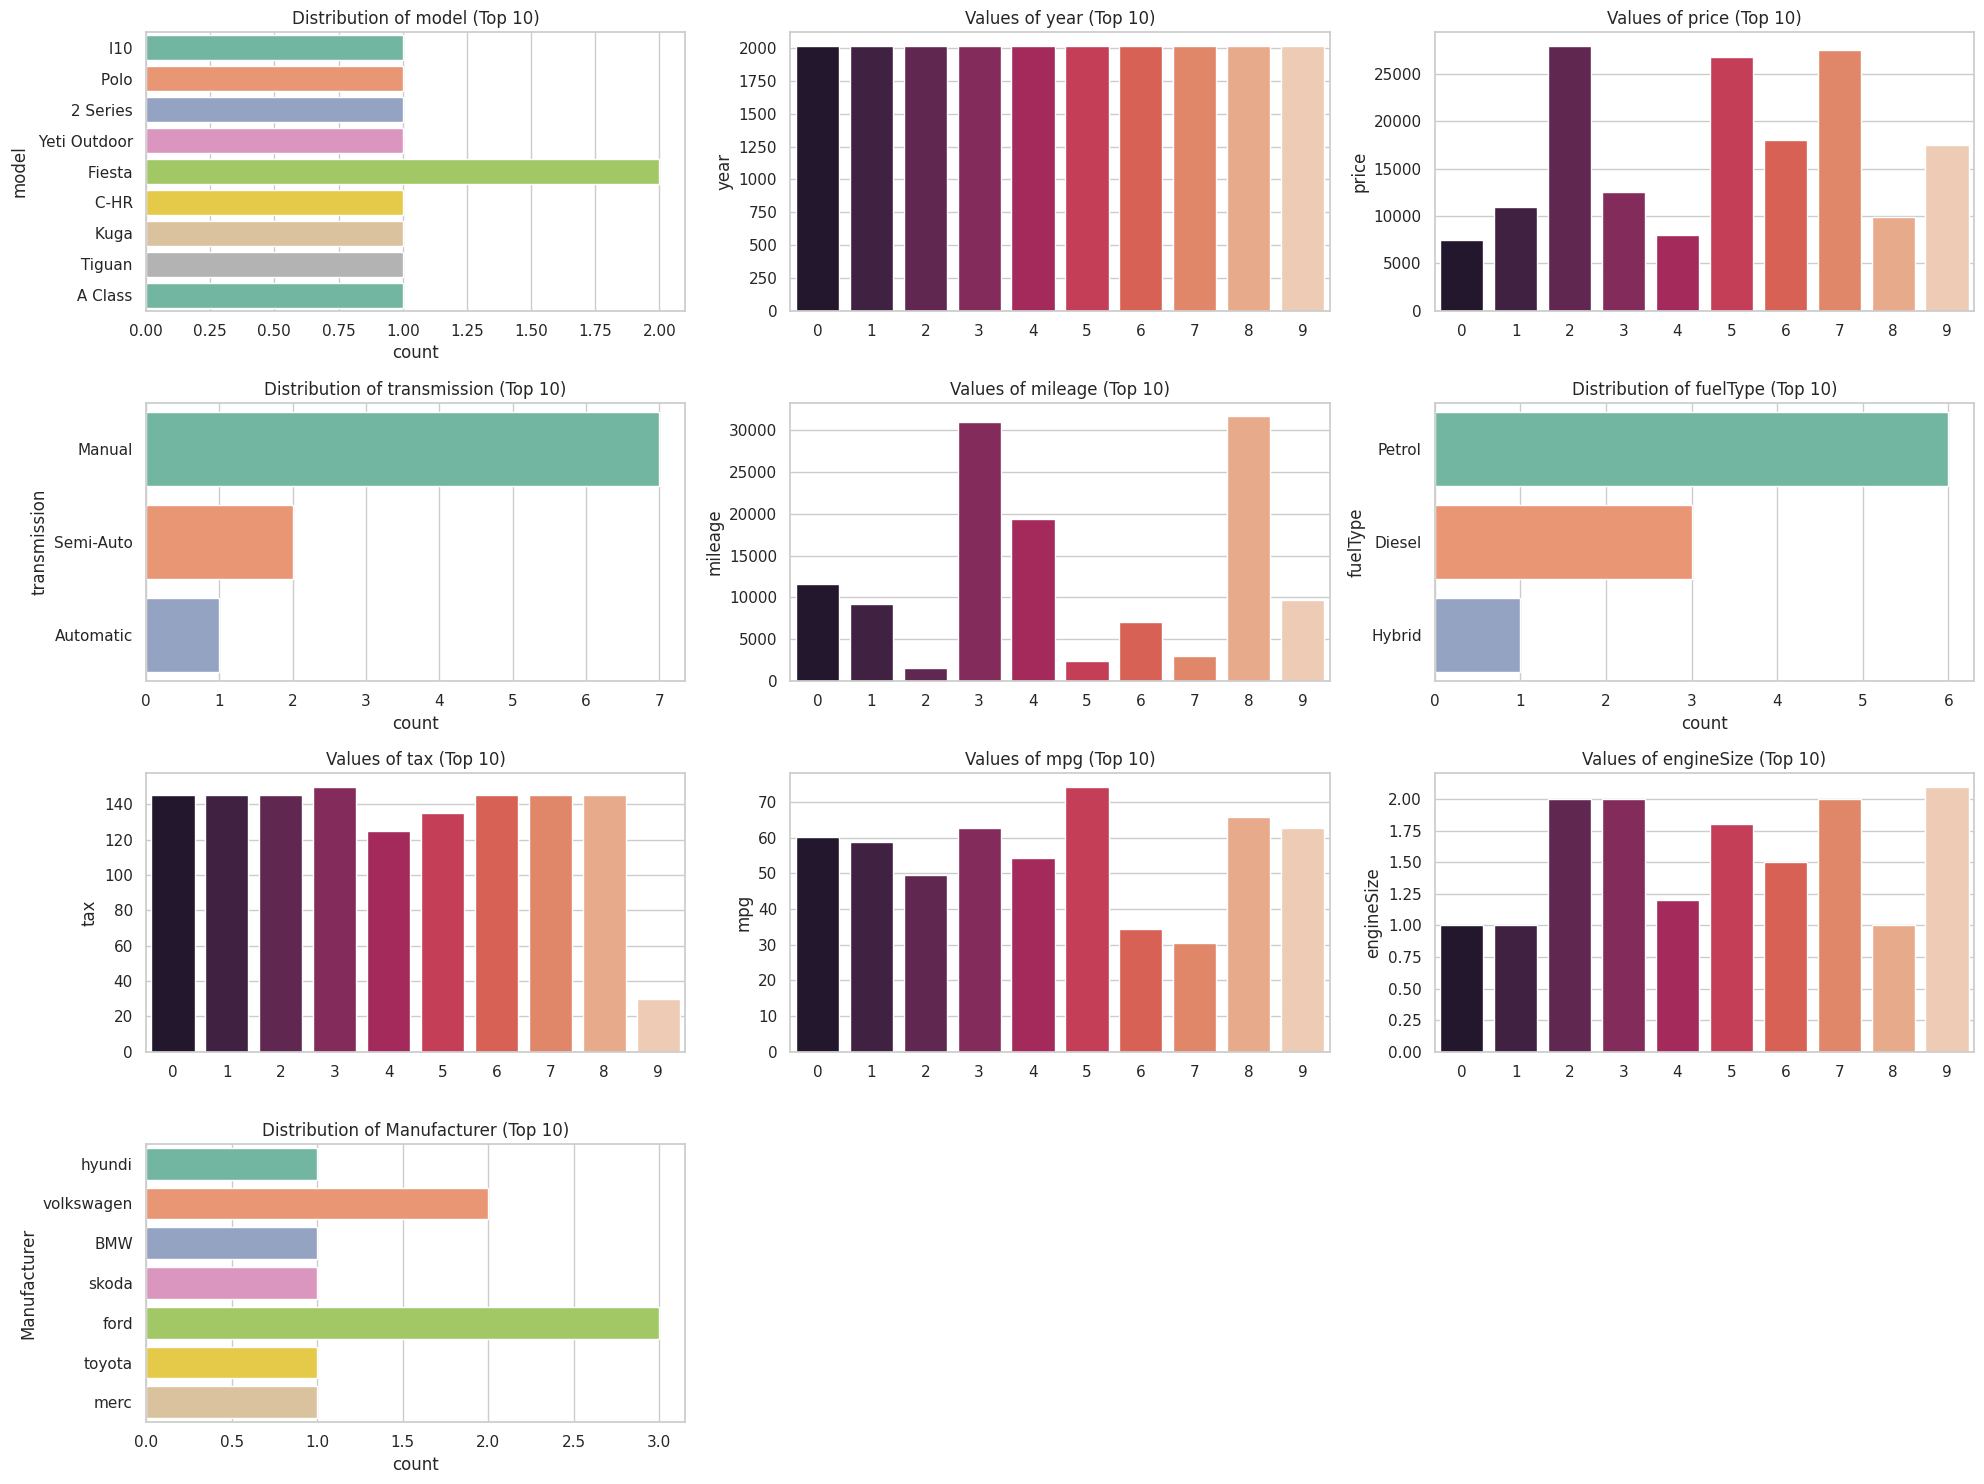

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization environment
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

data = pd.read_csv('/kaggle/input/90000-cars-data-from-1970-to-2024/CarsData.csv')

# We have multiple columns, some of which are categorical, some are numerical, and some are boolean.
# We will visualize the first 10 rows of each column with a suitable plot for its data type.

# Define a function to choose the plot type based on the column data type
def plot_column_data(column_data, column_name, subplot_index):
    plt.subplot(4, 3, subplot_index)
    if column_data.dtype == 'O':  # Object type, likely categorical
        sns.countplot(y=column_data[:10], palette="Set2")
        plt.title(f'Distribution of {column_name} (Top 10)')
    elif column_data.dtype == bool:  # Boolean type
        sns.countplot(x=column_data[:10], palette="Set1")
        plt.title(f'Distribution of {column_name} (Top 10)')
    else:  # Numerical type
        sns.barplot(x=column_data[:10].index, y=column_data[:10], palette="rocket")
        plt.title(f'Values of {column_name} (Top 10)')

# Plotting the first 10 rows for each column
for i, column in enumerate(data.columns, 1):
    plot_column_data(data[column], column, i)

plt.tight_layout()
plt.show()

The visualizations above represent the first 10 rows for each column in the dataset. They provide a preliminary look at the distribution and values across different attributes, including age, gender, time spent on different platforms, interests, location, demographics, profession, income, debt status, homeownership, and car ownership.